In [1]:
from common import *

import logging
logger = logging.getLogger()
logger.disabled = True

from mol_dataset import ZincDataset
from motif_vocab import MotifVocab


training_set = ZincDataset.training_set()
motif_vocab = MotifVocab.load()

2024-03-24 22:45:53,006 INFO: Enabling RDKit 2023.09.4 jupyter extensions


Default PyTorch device to: "cuda"


Sample a random molecule SMILES from the training set:

In [2]:
mol_smiles = training_set._df.sample().iloc[0]['smiles']
mol_smiles

'C=CCn1c([S-])nnc1CSC1=NN[C@@H](c2ccccc2)N1C'

Visualize the molecule:

2024-03-24 22:45:53,287 DEBUG: matplotlib data path: /home/loryruta/projects/bioinfo/.venv/lib/python3.11/site-packages/matplotlib/mpl-data
2024-03-24 22:45:53,290 DEBUG: CONFIGDIR=/home/loryruta/.config/matplotlib
2024-03-24 22:45:53,291 DEBUG: interactive is False
2024-03-24 22:45:53,292 DEBUG: platform is linux
2024-03-24 22:45:53,325 DEBUG: CACHEDIR=/home/loryruta/.cache/matplotlib
2024-03-24 22:45:53,327 DEBUG: Using fontManager instance from /home/loryruta/.cache/matplotlib/fontlist-v330.json
2024-03-24 22:45:53,436 DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-24 22:45:53,437 DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-24 22:45:53,438 DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-24 22:45:53,439 DEBUG: findfont: score(FontEntry(fname='/home/loryruta/projects/bioinfo/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts

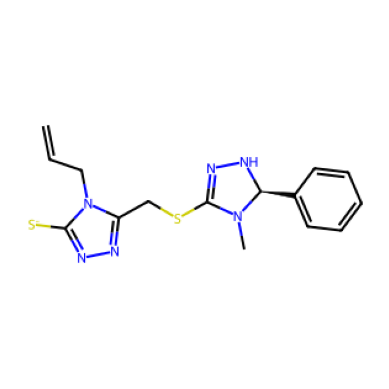

In [3]:
import matplotlib.pyplot as plt
from rdkit import Chem

plt.axis('off')
plt.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(mol_smiles)))

Split the molecule into Motifs and visualize them:

2024-03-24 22:45:53,759 DEBUG: STREAM b'IHDR' 16 13
2024-03-24 22:45:53,760 DEBUG: STREAM b'bKGD' 41 6
2024-03-24 22:45:53,760 DEBUG: b'bKGD' 41 6 (unknown)
2024-03-24 22:45:53,760 DEBUG: STREAM b'IDAT' 59 8192
2024-03-24 22:45:53,761 DEBUG: STREAM b'zTXt' 8910 129
2024-03-24 22:45:53,762 DEBUG: STREAM b'zTXt' 9051 200
2024-03-24 22:45:53,762 DEBUG: STREAM b'zTXt' 9263 74
2024-03-24 22:45:53,772 DEBUG: STREAM b'IHDR' 16 13
2024-03-24 22:45:53,773 DEBUG: STREAM b'bKGD' 41 6
2024-03-24 22:45:53,773 DEBUG: b'bKGD' 41 6 (unknown)
2024-03-24 22:45:53,773 DEBUG: STREAM b'IDAT' 59 4001
2024-03-24 22:45:53,774 DEBUG: STREAM b'zTXt' 4072 120
2024-03-24 22:45:53,774 DEBUG: STREAM b'zTXt' 4204 190
2024-03-24 22:45:53,775 DEBUG: STREAM b'zTXt' 4406 86
2024-03-24 22:45:53,784 DEBUG: STREAM b'IHDR' 16 13
2024-03-24 22:45:53,785 DEBUG: STREAM b'bKGD' 41 6
2024-03-24 22:45:53,785 DEBUG: b'bKGD' 41 6 (unknown)
2024-03-24 22:45:53,785 DEBUG: STREAM b'IDAT' 59 7561
2024-03-24 22:45:53,786 DEBUG: STREAM b

0 C1=CC=CC=C1
1 CCSC
2 [S-]C1=NN=CN1
3 C=CCN
4 C1=NNCN1
5 CN


2024-03-24 22:45:53,959 DEBUG: findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-24 22:45:53,959 DEBUG: findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTifinaghRhissaIxa-Regular.ttf', name='Noto Sans Tifinagh Rhissa Ixa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-24 22:45:53,960 DEBUG: findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-DemiItalic.otf', name='URW Bookman', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
2024-03-24 22:45:53,960 DEBUG: findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-24 22

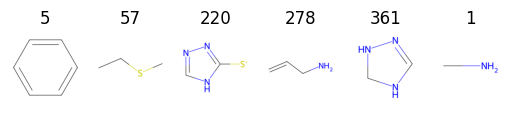

In [4]:
from construct_motif_graph import decompose_mol
from math import *

motif_smiles_list = decompose_mol(mol_smiles, motif_vocab)
assert len(motif_smiles_list) > 0

for i, motif_smiles in enumerate(motif_smiles_list):
    print(i, motif_smiles)
    
    motif_id = motif_vocab.at_smiles(motif_smiles)['id']
    
    plt.subplot(1, len(motif_smiles_list), i + 1)
    plt.axis('off')
    plt.title(str(motif_id))
    plt.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(motif_smiles)))

Construct the motif graph for the sampled SMILES. Draw it and annotate nodes with their Motif ID:

In [5]:
from construct_motif_graph import construct_motif_graph
import networkx as nx

motif_graph = construct_motif_graph(mol_smiles, motif_vocab)
motif_ids = nx.get_node_attributes(motif_graph, 'motif_id')
nx.draw(motif_graph, labels=motif_ids)

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type Series

Having the motif graph with information regarding attachments, convert it to obtain the initial molecule SMILES:

In [ ]:
from construct_motif_graph import convert_motif_graph_to_smiles

converted_smiles = convert_motif_graph_to_smiles(motif_graph, motif_vocab)

print(f"SMILES: {mol_smiles}")
print(f"Converted SMILES: {converted_smiles}")
print(f"Succeeded? {mol_smiles == converted_smiles}")

Visualize the initial molecule and the reconstructed molecule:

In [ ]:
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Input SMILES")
plt.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(mol_smiles)))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Converted SMILES")
plt.imshow(Chem.Draw.MolToImage(Chem.MolFromSmiles(converted_smiles)))